# W12 - Exercise

use the dataset __healthcare_dataset__ for this exercise

Column details: <br>
- **Name**: This column represents the name of the patient associated with the healthcare record. <br>
- **Age**: The age of the patient at the time of admission, expressed in years. <br>
- **Gender**: Indicates the gender of the patient, either "Male" or "Female."<br>
- **Blood** Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).<br>
- **Medical** Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.<br>
- **Date of Admission**: The date on which the patient was admitted to the healthcare facility.<br>
- **Doctor**: The name of the doctor responsible for the patient's care during their admission.<br>
- **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.<br>
- **Insurance Provider**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."<br>
- **Billing Amount**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.<br>
- **Room Number**: The room number where the patient was accommodated during their admission.<br>
- **Admission Type**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.<br>
- **Discharge Date**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.<br>
- **Medication**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."<br>
- **Test Results**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.<br>

This exercise is applicable to multiple machine learning algorithms. Create EDA to visualize data and results and explore as far as you can.
Task:
1. Data Cleaning, Transformation
2. Visualization (EDA)
3. Use at least one machine learning techniques (Regression, Classification, Clustering)
4. Use different modelling algorithm to compare results (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)

This exercise is to test your willingness to explore, critical thinking and the knowledge when to use what algorithms to achieve a purpose. 

In [34]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [35]:
# load the data set and show the first five transaction
url = "healthcare_dataset.csv"
df = pd.read_csv(url)
print(df.head())

                  Name  Age  Gender Blood Type Medical Condition  \
0      Tiffany Ramirez   81  Female         O-          Diabetes   
1          Ruben Burns   35    Male         O+            Asthma   
2            Chad Byrd   61    Male         B-           Obesity   
3    Antonio Frederick   49    Male         B-            Asthma   
4  Mrs. Brandy Flowers   51    Male         O-         Arthritis   

  Date of Admission          Doctor                   Hospital  \
0        2022-11-17  Patrick Parker           Wallace-Hamilton   
1        2023-06-01   Diane Jackson  Burke, Griffin and Cooper   
2        2019-01-09      Paul Baker                 Walton LLC   
3        2020-05-02  Brian Chandler                 Garcia Ltd   
4        2021-07-09  Dustin Griffin    Jones, Brown and Murray   

  Insurance Provider  Billing Amount  Room Number Admission Type  \
0           Medicare    37490.983364          146       Elective   
1   UnitedHealthcare    47304.064845          404      Eme

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [37]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [38]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

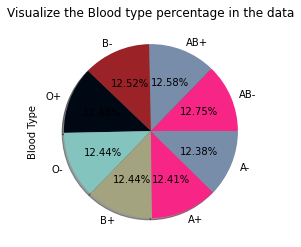

In [39]:
# Checking the blodd percentage in the  data set
df['Blood Type'].value_counts().sort_values(ascending=False)\
.plot(kind='pie',
     title="Visualize the Blood type percentage in the data",
      explode=[0,0,0,0,0,0,0,0.001],
      labels=['AB-','AB+','B-','O+','O-','B+','A+','A-'], 
      colors=['#f72585','#778da9','#9b2226','#000814','#83c5be','#a3a380'], 
      autopct='%1.2f%%',
      pctdistance=0.6, 
      shadow=True)
plt.show()

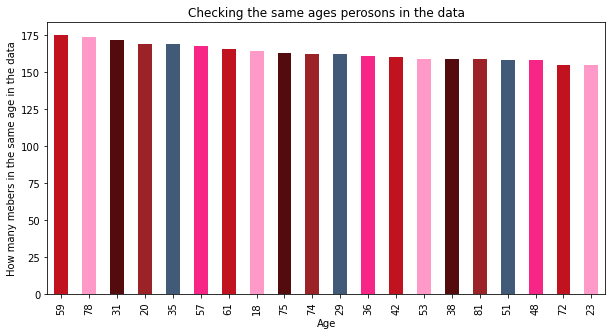

In [40]:
colors_values=['#c1121f','#ff99c8','#540b0e','#9b2226','#415a77','#f72585']
df['Age'].value_counts().sort_values(ascending=False).head(20)\
.plot(kind='bar',figsize=(10,5),color=colors_values,title="Checking the same ages perosons in the data")
plt.xlabel("Age")
plt.ylabel("How many mebers in the same age in the data")
plt.show()

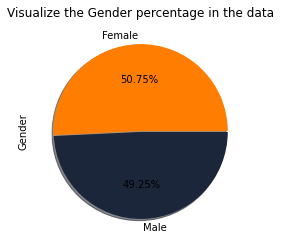

In [41]:
# Find the Gender percentage in the data set
df['Gender'].value_counts().sort_values(ascending=False)\
.plot(kind='pie',title="Visualize the Gender percentage in the data",
      explode=[0,0.01],
      labels=['Female','Male'], 
      colors=['#ff7d00','#1b263b'], 
      autopct='%1.2f%%',
      shadow=True)
plt.show()

In [42]:
df = df[[ 'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication', 'Test Results']]
df.head()

,Age,Gender,Blood Type,Medical Condition,Admission Type,Medication,Test Results
0,81,Female,O-,Diabetes,Elective,Aspirin,Inconclusive
1,35,Male,O+,Asthma,Emergency,Lipitor,Normal
2,61,Male,B-,Obesity,Emergency,Lipitor,Normal
3,49,Male,B-,Asthma,Urgent,Penicillin,Abnormal
4,51,Male,O-,Arthritis,Urgent,Paracetamol,Normal


In [43]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
for col in df.columns:
    if col!='Age':
        df[col]=lc.fit_transform(df[col])
df.head()

,Age,Gender,Blood Type,Medical Condition,Admission Type,Medication,Test Results
0,81,0,7,3,0,0,1
1,35,1,6,1,1,2,2
2,61,1,5,5,1,2,2
3,49,1,5,1,2,4,0
4,51,1,7,0,2,3,2


In [44]:
X = df.drop('Test Results',axis=1)
y = df['Test Results']

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.6812169518159013


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
# Initialize and fit the model
RandForest = RandomForestClassifier()
RandForest.fit(X_train,y_train)

# Predict
predictionsRandForest = RandForest.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, predictionsRandForest)
print(f"Accuracy: {accuracy}")

Accuracy: 0.342


In [47]:
DecisionT = DecisionTreeClassifier()
DecisionT.fit(X_train,y_train)

# Predict
predictionsDecisionT = DecisionT.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, predictionsDecisionT)
print(f"Accuracy: {accuracy}")

Accuracy: 0.3205


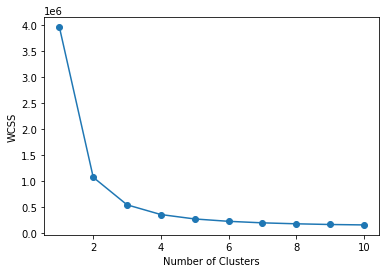

In [48]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range (1, 11):
    km = KMeans(n_clusters= i,
               n_init=5,
               max_iter=500,
               random_state=1)
    km.fit(df)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [49]:
from kneed import KneeLocator
# using kneelocator to find the elbow/knee
kl = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
optimal_k = kl.elbow
print("The optimal K for your model is", optimal_k)

The optimal K for your model is 3


In [50]:
km_model = KMeans(n_clusters=3, random_state=1)
y_kmeans = km_model.fit_predict(df)

In [51]:
import pandas as pd

# Assuming you have a DataFrame called "dataset" with the necessary columns

# Perform the K-means clustering and add the cluster labels to the dataset
df["K-Means Cluster"] = y_kmeans

# Ambil semua kolom numerik (misalnya, eksklusi kolom non-numerik)
numerical_columns = df.select_dtypes(include=['number']).columns

# Buat dictionary untuk fungsi agregasi yang ingin Anda terapkan
aggregations = {col: 'mean' for col in numerical_columns}
aggregations['K-Means Cluster'] = 'count'  # Tambahkan perhitungan jumlah cluster

# Group by "K-Means Cluster" dan terapkan agregasi ke semua kolom numerik
grouped_data = df.groupby("K-Means Cluster").agg(aggregations)

# Rename the column "K-Means Cluster" to "Count"
grouped_data.rename(columns={'K-Means Cluster': 'Count'}, inplace=True)

# Format the numbers to standard notation
grouped_data = grouped_data.applymap(lambda x: '{:.0f}'.format(x))

# Print the resulting grouped data
print(grouped_data)

                Age Gender Blood Type Medical Condition Admission Type  \
K-Means Cluster                                                          
0                29      0          4                 3              1   
1                74      0          3                 2              1   
2                53      0          3                 2              1   

                Medication Test Results Count  
K-Means Cluster                                
0                        2            1  3546  
1                        2            1  3205  
2                        2            1  3249  


In [52]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results[name] = accuracy

# Display the results
for name, accuracy in results.items():
    print(f"{name}: Accuracy - {accuracy}")


Random Forest: Accuracy - 0.334
XGBoost: Accuracy - 0.342
KNN: Accuracy - 0.3335
Logistic Regression: Accuracy - 0.3355


C:\Users\mahazoya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
